In [217]:
import io
import os 
import re
import pandas as pd
from google.cloud import vision
from google_vision_ai import VisionAI
from google_vision_ai import prepare_image_local, prepare_image_web, draw_boundary, draw_boundary_normalized

In [218]:
# Authentication
os.environ['GOOGLE_APPLICATION_CREDENTIALS']= 'client_file.json'
client = vision.ImageAnnotatorClient()

In [219]:
# prepare the image
def prepare_image_local(image_path):
    try:
        # Loads the image into memory
        with io.open(image_path, 'rb') as image_file:
            content = image_file.read()
        image = vision.Image(content=content)
        return image
    except Exception as e:
        print(e)
        return

In [220]:
# prepare_image_local('/Users/dkAndHus/Desktop/ImagesPOP6/3.jpg')

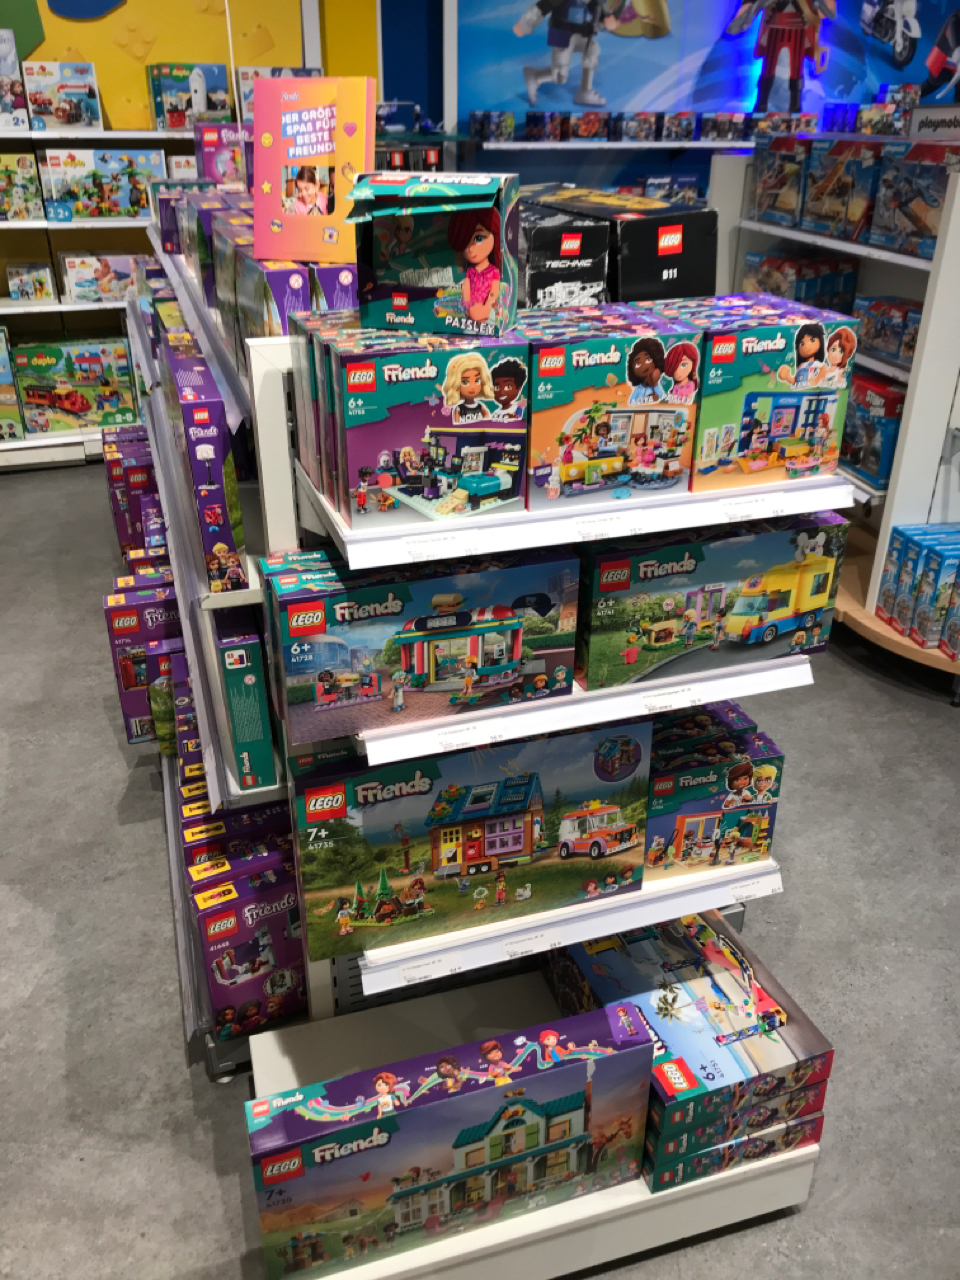

In [221]:
for label in response.label_annotations: 
    print(lable.description)
    print(label.score)

NameError: name 'response' is not defined

In [222]:
short_path = re.search(r'/([^/]+)$', image_path)

if short_path:
    filename = short_path.group(1)
    print(filename)
else:
    print("Filename not found")

lego_shop_1.jpg


In [223]:
# Using functions 
image = prepare_image_local(image_path)
va = VisionAI(client,image)
label_detection = va.label_detection()
df = pd.DataFrame(label_detection)

# add url

df['url'] = short_path.group(1)
df

,description,score,url
0,Urban design,0.86,lego_shop_1.jpg
1,City,0.76,lego_shop_1.jpg
2,Metropolitan area,0.76,lego_shop_1.jpg
3,Font,0.75,lego_shop_1.jpg
4,Metropolis,0.75,lego_shop_1.jpg
5,Urban area,0.75,lego_shop_1.jpg
6,Technology,0.75,lego_shop_1.jpg
7,Engineering,0.74,lego_shop_1.jpg
8,Art,0.70,lego_shop_1.jpg
9,Fan,0.67,lego_shop_1.jpg


In [224]:
def draw_boundary_normalized(image_file, vertices, caption=''):
    font = ImageFont.load_default()
    pil_image = Image.open(image_file)
    draw = ImageDraw.Draw(pil_image)
    xys = [(vertex.x * pil_image.size[0], vertex.y * pil_image.size[1]) for vertex in vertices]
    xys.append(xys[0])
    draw.line(xys, fill=(255, 255, 0), width=10)
    draw.text((xys[0][0], xys[0][1]-45), caption, font=font)
    pil_image.show()    

In [225]:
# Object detection
image_path = '/Users/dkAndHus/Desktop/ImagesPOP6/3.jpg'

va = VisionAI(client,image)
object_detections = va.object_detection()
for label in object_detections:
    print(label.name)
    print(label.score)
    font = ImageFont.load_default()
    draw_boundary_normalized(image_path,label.bounding_poly,label.name) 

Packaged goods
0.69


NameError: name 'ImageFont' is not defined

In [226]:
# Set the path to the folder containing images
image_folder_path = '/Users/dkAndHus/Desktop/ImagesPOP6/Photos'

# Initialize an empty list to store the text models for all images
models = []
files = []

# Loop through all image files in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith('lego_shop_1.jpg'):
        # Set the full path to the image file
        image_path = os.path.join(image_folder_path, filename)
        
        # Perform text detection on the image and append the results to the models list
        with io.open(image_path,'rb') as image_file:
            content = image_file.read()
        image = vision.Image(content=content)
        va = VisionAI(client,image)
        texts = va.text_detection()
        for indx, text in enumerate(texts[1:]):
            models.append(text.description)
            files.append(filename)
        
        # Create a pandas dataframe from the models list (excluding the first empty element)
        df_test = pd.DataFrame(models, columns=['text'])
        
        # Add a new column to the dataframe with the filename (excluding the file extension) as the url
        df_test['url'] = files
        print(filename)

# Display the dataframe
# df_test.to_excel("scan.xlsx") 
df_test

lego_shop_1.jpg


,text,url
0,HARLI,lego_shop_1.jpg
1,FES,lego_shop_1.jpg
2,CHARLE,lego_shop_1.jpg
3,CHARLE,lego_shop_1.jpg
4,put,lego_shop_1.jpg
...,...,...
57,29.95,lego_shop_1.jpg
58,Friends,lego_shop_1.jpg
59,Campingausflug,lego_shop_1.jpg
60,41726,lego_shop_1.jpg


### Model for extracting text from the images

In [239]:
# Set the path to the folder containing images
image_folder_path = '/Users/dkAndHus/Desktop/ImagesPOP6/adjusted'

# Initialize an empty list to store the text models for all images
models = []
files = []

# Loop through all image files in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith('.jpg'):
        # Set the full path to the image file
        image_path = os.path.join(image_folder_path, filename)
        
        # Perform text detection on the image and append the results to the models list
        with io.open(image_path,'rb') as image_file:
            content = image_file.read()
        image = vision.Image(content=content)
        va = VisionAI(client,image)
        texts = va.text_detection()
        for indx, text in enumerate(texts[1:]):
            models.append(text.description)
            files.append(filename)
        
        # Create a pandas dataframe from the models list (excluding the first empty element)
        df_text = pd.DataFrame(models, columns=['id'],dtype='str')
        
        # Add a new column to the dataframe with the filename (excluding the file extension) as the url
        df_text['url'] = files
        print(filename)

# Display the dataframe
df_text

lego_shop_89.jpg
lego_shop_62.jpg
lego_shop_76.jpg
lego_shop_77.jpg
lego_shop_63.jpg
lego_shop_88.jpg
lego_shop_100.jpg
lego_shop_49.jpg
lego_shop_75.jpg
lego_shop_61.jpg
lego_shop_60.jpg
lego_shop_74.jpg
lego_shop_48.jpg
lego_shop_70.jpg
lego_shop_64.jpg
lego_shop_58.jpg
lego_shop_59.jpg
lego_shop_65.jpg
lego_shop_71.jpg
lego_shop_98.jpg
lego_shop_67.jpg
lego_shop_73.jpg
lego_shop_72.jpg
lego_shop_66.jpg
lego_shop_99.jpg
lego_shop_29.jpg
lego_shop_15.jpg
lego_shop_14.jpg
lego_shop_28.jpg
lego_shop_16.jpg
lego_shop_17.jpg
lego_shop_13.jpg
lego_shop_8.jpg
lego_shop_9.jpg
lego_shop_12.jpg
lego_shop_10.jpg
lego_shop_38.jpg
lego_shop_39.jpg
lego_shop_11.jpg
lego_shop_20.jpg
lego_shop_34.jpg
lego_shop_7.jpg
lego_shop_6.jpg
lego_shop_35.jpg
lego_shop_21.jpg
lego_shop_37.jpg
lego_shop_23.jpg
lego_shop_4.jpg
lego_shop_5.jpg
lego_shop_22.jpg
lego_shop_36.jpg
lego_shop_32.jpg
lego_shop_26.jpg
lego_shop_1.jpg
lego_shop_27.jpg
lego_shop_33.jpg
lego_shop_25.jpg
lego_shop_31.jpg
lego_shop_19.jpg
leg

,id,url
0,B,lego_shop_89.jpg
1,DAMO,lego_shop_89.jpg
2,LOGLIG,lego_shop_89.jpg
3,Band,lego_shop_89.jpg
4,Frands,lego_shop_89.jpg
...,...,...
6576,UNTEMA,lego_shop_84.jpg
6577,20,lego_shop_84.jpg
6578,STARTER,lego_shop_84.jpg
6579,PACK,lego_shop_84.jpg


In [248]:
# Counting the instances for all pictures
df_count = df_text.groupby(['url'])['url'].count()
df_count

url
lego_shop_1.jpg     3
lego_shop_10.jpg    4
lego_shop_12.jpg    1
lego_shop_19.jpg    2
lego_shop_24.jpg    2
lego_shop_27.jpg    1
lego_shop_28.jpg    3
lego_shop_30.jpg    2
lego_shop_33.jpg    1
lego_shop_40.jpg    4
lego_shop_49.jpg    2
lego_shop_50.jpg    1
lego_shop_52.jpg    2
lego_shop_53.jpg    1
lego_shop_54.jpg    3
lego_shop_60.jpg    1
lego_shop_66.jpg    6
lego_shop_67.jpg    1
lego_shop_70.jpg    3
lego_shop_78.jpg    1
lego_shop_8.jpg     3
lego_shop_80.jpg    4
lego_shop_81.jpg    1
lego_shop_86.jpg    2
lego_shop_89.jpg    1
lego_shop_90.jpg    1
lego_shop_93.jpg    2
lego_shop_98.jpg    1
Name: url, dtype: int64

In [241]:
# Importing the database containing all datasets released

df_release = pd.read_excel('LEGORelease.xlsx',dtype='str')
df_info = df_release[['Product','Name']]
df_info = df_info.rename(columns={"Product": "id", "Name": "name"})
df_info

,id,name
0,10323,tbd Icons 10323
1,10320,tbd Icons 10320
2,10318,tbd Icons 10318
3,10321,tbd Icons 10321
4,21342,tbd LEGO Ideas 21342
...,...,...
1461,45517,Transformer 10V DC
1462,10233,Horizon Express
1463,3179,Repair Truck
1464,630,Brick Separator


In [245]:
df_text['overlap'] = df_text['id'].apply(lambda x: x in set(df_info['id']))
df_text = df_text[df_text['overlap'] == True]
df_text = df_text.drop_duplicates()
len(df_text)

59

In [246]:
df_text_66 = df_text[df_text['url'] == 'lego_shop_8.jpg'] 
df_text_66

,id,url,overlap
2228,41733,lego_shop_8.jpg,True
2238,41743,lego_shop_8.jpg,True
2242,41728,lego_shop_8.jpg,True


In [244]:
import uuid
# Adding the name

# Merging
df_sets = pd.merge(filtered_df, df_info, left_on='id', right_on='id')
df_sets = df_sets.drop('id', axis = 1)
# Remove duplicates and reset index 
df_sets = df_sets.drop_duplicates().reset_index(drop=True)
# reorganize the columns
df_sets = df_sets[['id', 'name', 'url']]
# Creating a unique id per shop 
df_sets = df_sets.sort_values('url')
df_sets['photo_id'] = (df_sets.groupby(['url']).cumcount()==0).astype(int)
df_sets['photo_id'] = df_sets['photo_id'].cumsum() 
df_sets['photo_id'] = 'photo ' + df_sets['photo_id'].astype(str)
df_sets.head()

KeyError: "['id'] not in index"

### Counting and filtering of pictures

In [172]:
df_count = df_text.groupby(['url'])['url'].count()
df_count = df_count.reset_index(name='count')
df_count = df_count.sort_values('count',ascending=[False])
# df_count['url'] = pd.merge(df_sets, df_count)['url']
# df_count = df_count.reset_index(drop=True)
df_count['url'] = df_count['url'].str.replace('.jpg', '')
len(df_count)

/var/folders/ck/qnb2k9yn3r7cbvdps79x30sh0000gp/T/ipykernel_14472/1169249019.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_count['url'] = df_count['url'].str.replace('.jpg', '')


29

In [151]:
df_count.to_excel('df_count.xlsx', index=False)

In [20]:
# Create code so we can view the image based on the count 
    # concatonate 
    
count = df_count['url'][1]
image_folder_path = '/Users/dkAndHus/Desktop/ImagesPOP6/' + count
image_folder_path 

'/Users/dkAndHus/Desktop/ImagesPOP6/h.ThomasQuade(391015)_Anton-Saefkow-Straße218069Rostock13_LutzGesien_DELUTGES_INST_FRIENDS_FENST_JAN_FEB_23-Takeaphotooftheinstorematerial-Takeaphotooftheinstorematerial_2023-02-14_H13_M27_1562062.jpg'

In [ ]:
# Call an image 